In [ ]:
from google.colab import files
uploaded = files.upload()

Saving customer_for_cluster.csv to customer_for_cluster.csv


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("default")
import seaborn as sns

In [4]:
customer_data = pd.read_csv("customer_for_cluster.csv")
customer_data.head()

,Install,Time_stamp,Status,ID,Payment,Game_Name,Level_score,Time_score,PK,BOSS,Gacha,Attack,Mining
0,2022-05-12,2022-05-27,purchase,Jaime_521,4900,Mine Ground,83.156420,71.314875,48.576665,57.254297,14.831634,88.947130,72.991489
1,2022-01-29,2022-02-08,purchase,Jasmine_839,9900,Mine Ground,85.171839,73.128354,78.095900,74.245402,31.625817,33.573938,77.701619
2,2022-01-14,2022-01-23,purchase,Rebecca_530,4900,Mine Ground,82.928130,70.780184,46.003125,69.213774,37.878962,76.024761,61.387637
3,2022-02-19,2022-03-08,purchase,Kimberly_648,9900,Mine Ground,83.700084,77.175798,36.722313,67.653544,26.107783,86.274249,65.007521
4,2022-04-02,2022-04-11,purchase,Edward_512,19900,Mine Ground,86.330819,76.646228,63.983821,74.986060,47.469284,35.454266,72.015434


In [5]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18506 entries, 0 to 18505
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Install      18506 non-null  object 
 1   Time_stamp   18506 non-null  object 
 2   Status       18506 non-null  object 
 3   ID           18506 non-null  object 
 4   Payment      18506 non-null  int64  
 5   Game_Name    18506 non-null  object 
 6   Level_score  18506 non-null  float64
 7   Time_score   18506 non-null  float64
 8   PK           18506 non-null  float64
 9   BOSS         18506 non-null  float64
 10  Gacha        18506 non-null  float64
 11  Attack       18506 non-null  float64
 12  Mining       18506 non-null  float64
dtypes: float64(7), int64(1), object(5)
memory usage: 1.8+ MB


### 군집분석

In [12]:
from sklearn.cluster import KMeans
from sklearn import preprocessing

temp_var = customer_data[['Level_score','Time_score']]
temp_var

,Level_score,Time_score
0,83.156420,71.314875
1,85.171839,73.128354
2,82.928130,70.780184
3,83.700084,77.175798
4,86.330819,76.646228
...,...,...
18501,28.755368,63.765649
18502,27.767066,58.762254
18503,30.275532,37.941294
18504,28.758063,65.117374


### 사이킷런(sklearn)라이브러리에서 제공하는 preprocessing 모듈을 이용해 temp_var의 각 값들을 정규화

In [13]:
temp_var = preprocessing.StandardScaler().fit(temp_var).transform(temp_var)
temp_var

array([[ 1.81757446,  1.30779766],
       [ 1.89747158,  1.45885402],
       [ 1.80852439,  1.26325983],
       ...,
       [-0.278779  , -1.47210294],
       [-0.33893592,  0.79156792],
       [-0.81119341, -1.03500583]])

In [14]:
Kmeans = KMeans(n_clusters=5,
                init='k-means++',
                n_init=True,
                verbose=True,
                max_iter = 100,
                random_state=1111
                )
Kmeans.fit(temp_var)

Initialization complete
Iteration 0, inertia 2497.8632079961108
Iteration 1, inertia 2200.883438081366
Iteration 2, inertia 2092.338616177069
Iteration 3, inertia 2007.5957692174911
Iteration 4, inertia 1945.6131933510846
Iteration 5, inertia 1906.2578810272917
Iteration 6, inertia 1885.3067588011133
Iteration 7, inertia 1873.7510076411158
Iteration 8, inertia 1866.9684670908505
Iteration 9, inertia 1863.0984968737648
Iteration 10, inertia 1861.1510878670192
Iteration 11, inertia 1860.2433556391384
Converged at iteration 11: center shift 4.568322224962504e-05 within tolerance 0.00010000000000000034.


KMeans(max_iter=100, n_clusters=5, n_init=True, random_state=1111, verbose=True)

In [15]:
cluster_label = Kmeans.labels_
print(cluster_label)

[1 1 1 ... 2 4 3]


In [16]:
cluster_label = Kmeans.labels_

customer_data['Cluster'] = pd.DataFrame(cluster_label)
customer_data.head()

,Install,Time_stamp,Status,ID,Payment,Game_Name,Level_score,Time_score,PK,BOSS,Gacha,Attack,Mining,Cluster
0,2022-05-12,2022-05-27,purchase,Jaime_521,4900,Mine Ground,83.156420,71.314875,48.576665,57.254297,14.831634,88.947130,72.991489,1
1,2022-01-29,2022-02-08,purchase,Jasmine_839,9900,Mine Ground,85.171839,73.128354,78.095900,74.245402,31.625817,33.573938,77.701619,1
2,2022-01-14,2022-01-23,purchase,Rebecca_530,4900,Mine Ground,82.928130,70.780184,46.003125,69.213774,37.878962,76.024761,61.387637,1
3,2022-02-19,2022-03-08,purchase,Kimberly_648,9900,Mine Ground,83.700084,77.175798,36.722313,67.653544,26.107783,86.274249,65.007521,1
4,2022-04-02,2022-04-11,purchase,Edward_512,19900,Mine Ground,86.330819,76.646228,63.983821,74.986060,47.469284,35.454266,72.015434,1


In [17]:
customer_data['Cluster'].value_counts()

0    3982
3    3785
1    3701
2    3692
4    3346
Name: Cluster, dtype: int64

In [18]:
temp_var = customer_data.groupby('Cluster').agg({'Time_score':'mean','Level_score':'mean','Payment':'mean'})
temp_var

,Time_score,Level_score,Payment
Cluster,,,
0,54.574810,27.921623,903.917629
1,73.598689,85.686837,1019.265063
2,40.178647,27.362345,988.894908
3,47.843086,14.802618,885.468956
4,62.781806,31.397860,1033.084280


In [19]:
temp_var.T

Cluster,0,1,2,3,4
Time_score,54.574810,73.598689,40.178647,47.843086,62.781806
Level_score,27.921623,85.686837,27.362345,14.802618,31.397860
Payment,903.917629,1019.265063,988.894908,885.468956,1033.084280


### 시각화를 통해서 자세히 살펴보기

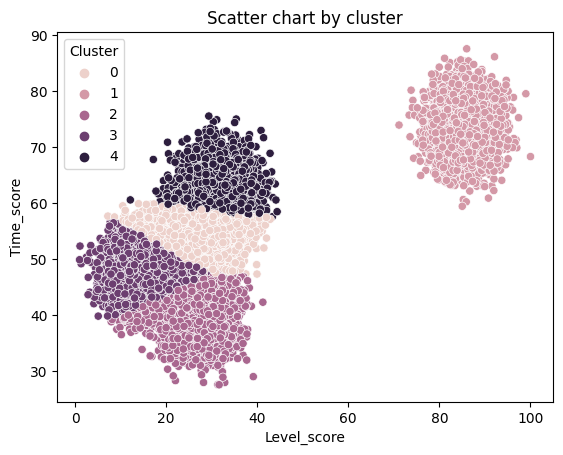

In [20]:
ax = sns.scatterplot(data=customer_data,x='Level_score',y='Time_score',hue='Cluster')
plt.title("Scatter chart by cluster")
plt.show()

In [21]:
temp_var.index = temp_var.index.tolist()
temp_var = temp_var.reset_index()
temp_var = temp_var.rename(columns={'index':'Cluster'})
temp_var

,Cluster,Time_score,Level_score,Payment
0,0,54.574810,27.921623,903.917629
1,1,73.598689,85.686837,1019.265063
2,2,40.178647,27.362345,988.894908
3,3,47.843086,14.802618,885.468956
4,4,62.781806,31.397860,1033.084280


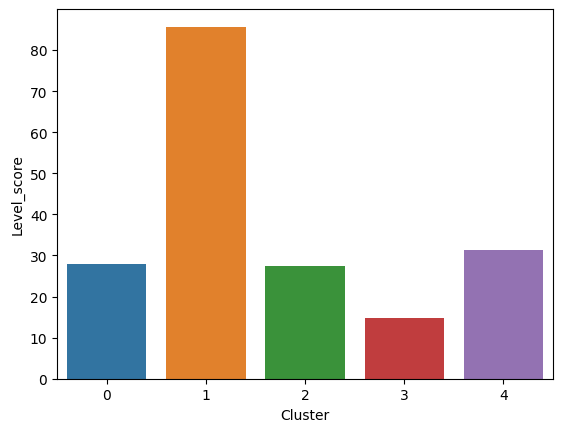

In [22]:
ax = sns.barplot(data=temp_var,x='Cluster',y='Level_score')
containers = ax.containers[0]

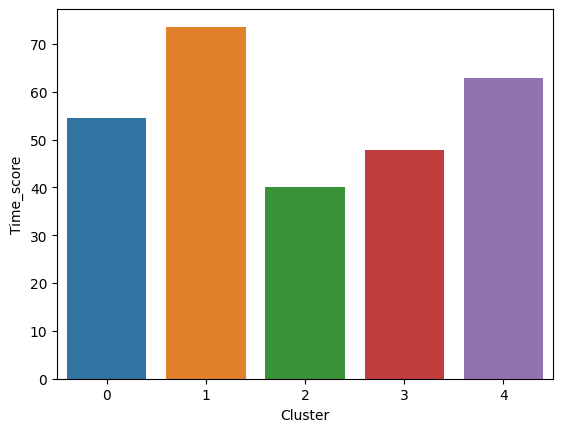

In [23]:
ax = sns.barplot(data=temp_var,x='Cluster',y='Time_score')
containers = ax.containers[0]

In [24]:
corr_data = customer_data[['Time_score','PK','BOSS','Gacha','Attack','Mining']].corr().round(2)
corr_data

,Time_score,PK,BOSS,Gacha,Attack,Mining
Time_score,1.00,0.32,0.06,-0.08,0.08,0.63
PK,0.32,1.00,0.65,0.05,-0.14,0.24
BOSS,0.06,0.65,1.00,-0.17,0.02,-0.08
Gacha,-0.08,0.05,-0.17,1.00,-0.69,-0.05
Attack,0.08,-0.14,0.02,-0.69,1.00,0.06
Mining,0.63,0.24,-0.08,-0.05,0.06,1.00


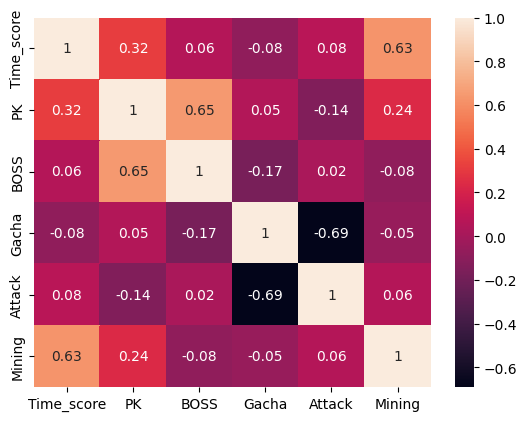

In [26]:
sns.heatmap(data=corr_data,annot=True)

In [27]:
customer_data.head()

,Install,Time_stamp,Status,ID,Payment,Game_Name,Level_score,Time_score,PK,BOSS,Gacha,Attack,Mining,Cluster
0,2022-05-12,2022-05-27,purchase,Jaime_521,4900,Mine Ground,83.156420,71.314875,48.576665,57.254297,14.831634,88.947130,72.991489,1
1,2022-01-29,2022-02-08,purchase,Jasmine_839,9900,Mine Ground,85.171839,73.128354,78.095900,74.245402,31.625817,33.573938,77.701619,1
2,2022-01-14,2022-01-23,purchase,Rebecca_530,4900,Mine Ground,82.928130,70.780184,46.003125,69.213774,37.878962,76.024761,61.387637,1
3,2022-02-19,2022-03-08,purchase,Kimberly_648,9900,Mine Ground,83.700084,77.175798,36.722313,67.653544,26.107783,86.274249,65.007521,1
4,2022-04-02,2022-04-11,purchase,Edward_512,19900,Mine Ground,86.330819,76.646228,63.983821,74.986060,47.469284,35.454266,72.015434,1


In [32]:
customer_data['PK'].groupby(customer_data['Cluster']).mean()
customer_data['BOSS'].groupby(customer_data['Cluster']).mean()
customer_data['Gacha'].groupby(customer_data['Cluster']).mean()
customer_data['Attack'].groupby(customer_data['Cluster']).mean()
customer_data['Mining'].groupby(customer_data['Cluster']).mean()

Cluster
0    44.296638
1    70.931991
2    44.314125
3    44.400393
4    44.129783
Name: Mining, dtype: float64

In [33]:
temp_var = customer_data.groupby('Cluster').agg({'PK':'mean','BOSS':'mean','Gacha':'mean','Attack':'mean','Mining':'mean'})
temp_var

,PK,BOSS,Gacha,Attack,Mining
Cluster,,,,,
0,36.410750,56.838898,53.914554,40.626633,44.296638
1,54.686770,59.058532,48.984359,45.428646,70.931991
2,36.166267,56.794376,53.803939,40.581539,44.314125
3,36.626348,56.786465,53.984571,40.614868,44.400393
4,36.610005,56.849763,54.449709,40.263080,44.129783


In [35]:
temp_var.index.dtype

dtype('int64')

In [37]:
temp_var.index = temp_var.index.tolist()
temp_var.index

Int64Index([0, 1, 2, 3, 4], dtype='int64')

In [38]:
temp_var = temp_var.reset_index(drop=True)
temp_var

,PK,BOSS,Gacha,Attack,Mining
0,36.410750,56.838898,53.914554,40.626633,44.296638
1,54.686770,59.058532,48.984359,45.428646,70.931991
2,36.166267,56.794376,53.803939,40.581539,44.314125
3,36.626348,56.786465,53.984571,40.614868,44.400393
4,36.610005,56.849763,54.449709,40.263080,44.129783


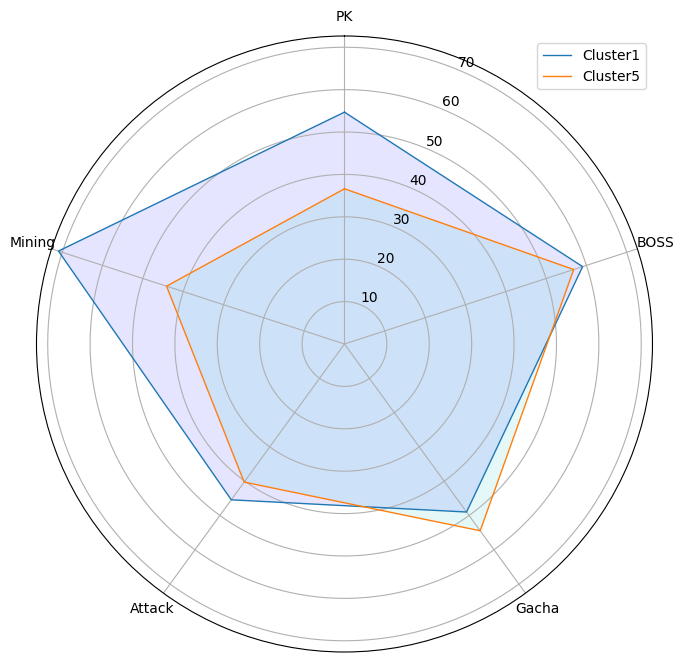

In [39]:
from math import pi

categories = list(temp_var)
N = len(categories)

angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

plt.figure(figsize=(8,8))
ax = plt.subplot(111,polar = True)

ax.set_theta_offset(pi/2)
ax.set_theta_direction(-1)

values = temp_var.loc[1].tolist()
values.append(values[0])
ax.plot(angles,values,linewidth=1,linestyle='solid',label='Cluster1')
ax.fill(angles,values,'b',alpha=0.1)

values = temp_var.loc[4].tolist()
values.append(values[0])
ax.plot(angles,values,linewidth=1,linestyle='solid',label='Cluster5')
ax.fill(angles,values,'c',alpha=0.1)

plt.xticks(angles[:-1],categories)
plt.legend()
plt.show()